In [14]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [29]:

Imagencv2 = cv2.imread(r'D:\Usuario\OneDrive\Escritorio\Uni\Procesamiento digital de Imagenes\YIQ\Inputs\Astro.jpeg')
ImagenRGBcv2=cv2.cvtColor(Imagencv2,cv2.COLOR_BGR2RGB )

ImagenCIE = ImagenRGBcv2.copy()

### Transformaciones


In [4]:
def RGBaYIQ(imagen):
    T = [[0.299, 0.587, 0.114],
                  [0.59590059, -0.27455667, -0.32134392],
                  [0.21153661, -0.52273617, 0.31119955]]
    ImagenCIE = imagen.copy()/255
    for i in range(len(imagen[0])):
        for j in range(len(imagen[0])):
            ImagenCIE[i,j] = np.dot(T,imagen[i,j]/255)
        
    return ImagenCIE

def YIQaRGB(imagen):
    T = [[0.299, 0.587, 0.114],
                  [0.59590059, -0.27455667, -0.32134392],
                  [0.21153661, -0.52273617, 0.31119955]]
    invT = np.linalg.inv(T)
    ImagenRGB = imagen.copy()/255
    for i in range(len(imagen[0])):
        for j in range(len(imagen[0])):
            ImagenRGB[i,j] = np.dot(invT,imagen[i,j])       
    return ImagenRGB



In [31]:
def funcion(param ,tipo, codo, rodilla):
   
    if tipo=='raiz':
        return np.sqrt(param)
    elif tipo=='lineal_ajustada':
        if param<codo:
            return 0
        elif codo<param<rodilla:
            return (param-codo)/(rodilla-codo)
        elif param>rodilla:
            return 1
    else:
        return param  
    
    
def modificarYIQ(imagen,Y=1,I=1,Q=1):
    ImagenYIQ= imagen.copy()
    for i in range(len(imagen[0])):
        for j in range(len(imagen[0])):
            ImagenYIQ[i,j][0] = Y*imagen[i,j][0]
            ImagenYIQ[i,j][1] = I*imagen[i,j][1]
            ImagenYIQ[i,j][2] = Q*imagen[i,j][2]
    return ImagenYIQ

def EQ(imagen,tipo, codo=1, rodilla=1):
    ImagenYIQ= imagen.copy()
    for i in range(len(imagen[0])):
        for j in range(len(imagen[0])):
            ImagenYIQ[i,j][0] = funcion(imagen[i,j][0],tipo, codo,rodilla)
    return ImagenYIQ

### Imagen Original

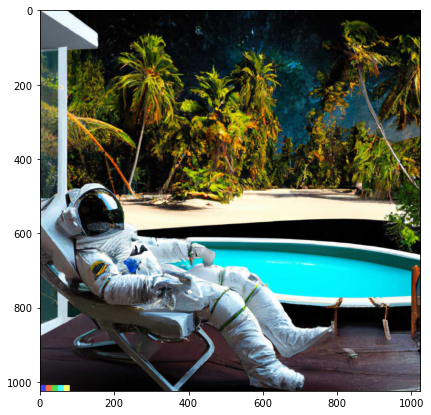

In [28]:
imagen = RGBaYIQ(ImagenRGBcv2)
plt.figure(figsize=(7,7))
plt.imshow(ImagenRGBcv2)

### Modificacion de matriz YIQ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


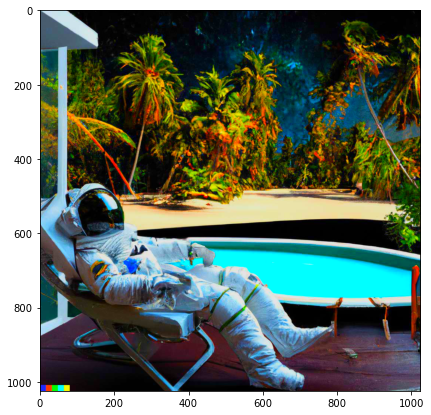

In [18]:

X = modificarYIQ(imagen,Y=0.9,I=2,Q=2)
im = YIQaRGB(X)
plt.figure(figsize=(7,7))
plt.imshow(im)


### EQ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


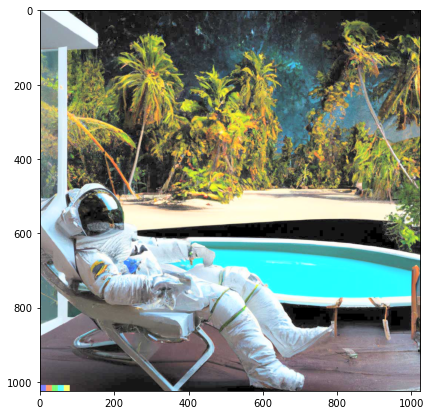

In [40]:
im_eq=EQ(imagen,'raiz')
im = YIQaRGB(im_eq)
plt.figure(figsize=(7,7))
plt.imshow(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


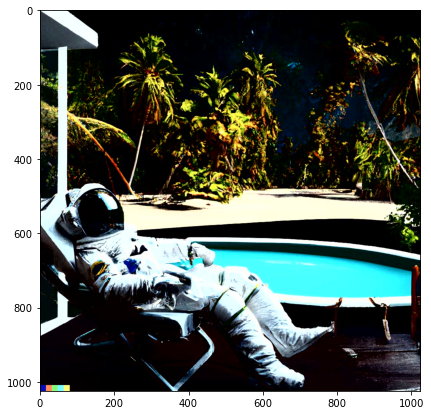

In [41]:
im_eq=EQ(imagen,'lineal_ajustada',0.3,0.7)
im = YIQaRGB(im_eq)
plt.figure(figsize=(7,7))
plt.imshow(im)
